<a href="https://colab.research.google.com/github/tmoura/machinelearning/blob/master/Exerc%C3%ADcio_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Perceptron

In [130]:
import numpy as np
class Perceptron:

  def __init__(self, teta, w, n, epochs):

    self.teta = teta
    self.w = w
    self.n = n
    self.epochs = epochs

  def train_perceptron(self,train_x,train_y):

    for i in range(self.epochs):
      for j in range(len(train_x)):

        u = sum(np.array(self.w) * np.array(train_x[j])) - self.teta # Função de Ativação

        y = 1 if u >= 0 else 0 # Função de Saída

        erro = train_y[j] - y

        self.w = list(np.array(self.w) + (self.n * np.array(train_x[j]) * erro))

        self.teta = self.teta + (self.n * -1 * erro)

  def predict_perceptron(self,test_x):

    results = []

    for i in range(len(test_x)):

        u = sum(np.array(self.w) * np.array(test_x[i])) - self.teta

        r = 1 if u >= 0 else 0
        results.append(r)

    return results

### Perceptron para resolver o AND e o OR

In [131]:
############ AND

x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

############ OR

#y = np.array([0, 1, 1, 1])

In [ ]:
model = Perceptron(0,[0,0],0.05,50)

model.train_perceptron(x,y)
print(model.predict_perceptron(x))

print(model.w)
print(model.teta)

### Base de Classificação Sintética

In [137]:
## Função para plotar o dataset com o perceptron

def plot_linear_classifier(x, y, w, b):
    x1_min, x1_max = x[:,0].min(), x[:,0].max()
    x2_min, x2_max = x[:,1].min(), x[:,1].max()

    x1, x2 = np.meshgrid(np.linspace(x1_min-1, x1_max+1,100), np.linspace(x2_min-1, x2_max+1, 100))
    x_mesh = np.array([x1.ravel(), x2.ravel()]).T

    plt.scatter(x[:,0], x[:,1], c=y.ravel(), cmap='bwr')

    y_mesh = np.dot(x_mesh, np.array(w).reshape(1, -1).T) + b
    y_mesh = np.where(y_mesh <= 0, 0, 1)

    plt.contourf(x1, x2, y_mesh.reshape(x1.shape), cmap='bwr', alpha=0.5)
    plt.xlim(x1_min-1, x1_max+1)
    plt.ylim(x2_min-1, x2_max+1)

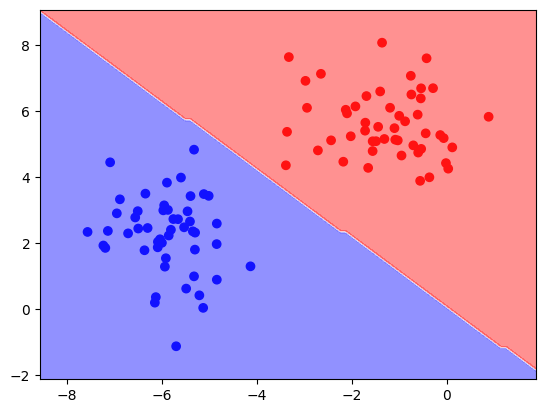

In [151]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

x, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=1234) # Gerar dataset com 2 clusters

model = Perceptron(0,[0,0],0.05,100)
model.train_perceptron(x,y)
model.predict_perceptron(x)

plot_linear_classifier(x, y, model.w, model.teta)

In [ ]:
from sklearn import metrics

result = model.predict_perceptron(x)
acc = metrics.accuracy_score(result, y)
show = round(acc * 100)
print("{}%".format(show))

### Dataset Sintético

In [ ]:
import pandas as pd

df = pd.DataFrame(columns=('x1', 'x2'), data=np.random.uniform(size=(600,2)))



#### Plotar o Dataset Sintético
fig = plt.figure(figsize=(10,10))
ax = fig.gca()

def testing(inputs):
    answer = int(np.sum(inputs) > 1)
    return answer

df['y'] = df.apply(testing, axis=1)

df[df.y==1].plot(kind='scatter', ax=ax, x='x1', y='x2', color='blue')
df[df.y==0].plot(kind='scatter', ax=ax, x='x1', y='x2', color='red')
plt.grid()
plt.title('Dataset')
ax.set_xlim(-0.1,1.1)
ax.set_ylim(-0.1,1.1)

In [140]:
y = df['y'] # extrai a primeira coluna, que é o label
X = df.loc[:, 'x1':'x2']

In [146]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y) # 80% treino e 20% teste

model = Perceptron(0.15, [0.1,0.2], 0.05, 500)

train_x = X_train.values.tolist()
train_y = y_train.values.tolist()

test_x = X_test.values.tolist()
test_y = y_test.values.tolist()

model.train_perceptron(train_x,train_y)

In [ ]:
from sklearn import metrics

result = model.predict_perceptron(test_x)
acc = metrics.accuracy_score(result, test_y)
show = round(acc * 100)
print("{}%".format(show))

print(list(result))
print(list(y_test))